      No  ones        X1        X2        X3        X4        X5        X6  \
0      1     1 -0.822688  1.254111 -0.791537  2.004982  1.124070  0.448220   
1      2     1 -0.822688  0.156896 -0.615866  1.665488  0.911342  0.400654   
2      3     1  1.539289 -0.387322 -0.413515  0.307513  1.485063  0.687352   
3      4     1  1.244928 -0.387322 -0.413515  0.307513  1.485063  0.687352   
4      5     1 -1.120595 -1.115873 -0.549332  0.307513  0.833180  0.592220   
..   ...   ...       ...       ...       ...       ...       ...       ...   
409  410     1 -0.528327 -0.352211  2.375490 -1.389957 -2.214314 -1.925506   
410  411     1 -1.709316 -1.063206 -0.787118  1.665488  0.427062  0.634573   
411  412     1  0.358300  0.095452 -0.549014  0.986500  0.821899  0.423460   
412  413     1 -0.528327 -0.843763 -0.775745  0.307513 -0.184532  0.476238   
413  414     1  1.244928 -0.984207 -0.787118  1.665488  0.427062  0.634573   

        Y  
0    37.9  
1    42.2  
2    47.3  
3    54.8  
4  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:195: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


10.22310443057835


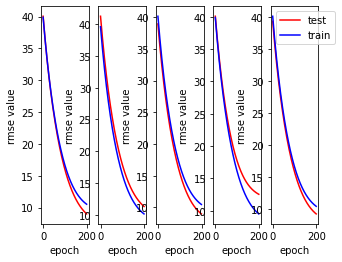

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import random
import scipy
# print("bsbsbshs")
df = pd.read_csv("Real_estate.csv")


newcolumn = []
for i in range(len(df)):
    newcolumn.append(1)
df.insert(1,"ones",newcolumn)

# print(df)

for column in df.columns:
    if(column !="No" and column!= 'ones' and column!= 'Y'):
        # print(column)
        df[column] =( df[column] - df[column].mean())/ df[column].std()
print(df)
# df =df.sample(frac=1).reset_index(drop=True)
observation_matrix = df.iloc[::,1:8]
y_actual_matrix = df.iloc[::,8::]
# print(y_actual_matrix)
# # print(df)
# y_train =pd.DataFrame(data=y_actual_matrix.iloc[0:300]).reset_index(drop=True) 
# x_train =pd.DataFrame(data=observation_matrix.iloc[0:300]).reset_index(drop=True) 

# y_train =pd.DataFrame(data=y_actual_matrix.iloc[::]).reset_index(drop=True) 
# x_train =pd.DataFrame(data=observation_matrix.iloc[::]).reset_index(drop=True) 


# y_test =pd.DataFrame(data=y_actual_matrix.iloc[300::]).reset_index(drop=True) 
# x_test =pd.DataFrame(data=observation_matrix.iloc[300::]).reset_index(drop=True) 

np_y_train =pd.DataFrame(data=y_actual_matrix.iloc[0:350]).reset_index(drop=True)
np_x_train =pd.DataFrame(data=observation_matrix.iloc[0:350]).reset_index(drop=True)

np_y_test =pd.DataFrame(data=y_actual_matrix.iloc[350::]).reset_index(drop=True)
np_x_test =pd.DataFrame(data=observation_matrix.iloc[350::]).reset_index(drop=True) 



w = np.random.normal(0,0,size=(7,1))

# df_weights = pd.DataFrame(data=weights)

learning_rate =0.01
epochs=200
lamda=0.1

# w = weights.transpose()
# np_x_train = x_train.to_numpy()


def analytic_solution(x_train,y_train,x_test,y_test):
    weights =[]
    # x_train 
    # y_train 
    weights = np.linalg.inv((x_train.to_numpy().transpose() @ x_train.to_numpy())) @ (x_train.to_numpy().transpose() @ y_train.to_numpy())
    print(RMSE(weights,x_test,y_test))
    print(training_RMSE(weights,x_train,y_train))
    return weights


# print(analytic_solution(x_train,y_train))


def derivative(weightindex, weightarr,x_train,y_train):
    derivative=0
    # print(x_train)
    # print(x_train.iloc[0])
    # print(y_train)
    for i in range(0,len(x_train)):
        # if(weightindex==0):
            # print(x_train.to_numpy()[i][weightindex])
        derivative+= (np.dot(x_train.iloc[i].to_numpy().reshape(1,7),weightarr)-y_train._get_value(i,"Y"))*x_train.to_numpy()[i][weightindex]
    derivative = derivative/len(x_train)
    return derivative

def L2_derivative(weightindex, weightarr,x_train,y_train,lamda):
    derivative=0
    # print(x_train)
    # print(x_train.iloc[0])
    # print(y_train)
    for i in range(0,len(x_train)):
        derivative+= (np.dot(x_train.iloc[i].to_numpy().reshape(1,7),weightarr)-y_train._get_value(i,"Y"))*x_train.to_numpy()[i][weightindex] + weightarr[weightindex]*lamda*2
    return derivative


def L1_derivative(weightindex, weightarr,x_train,y_train,lamda):
    derivative=0
    # print(x_train)
    # print(x_train.iloc[0])
    # print(y_train)
    if(weightarr[weightindex]<0):
        for i in range(0,len(x_train)):
            derivative+= (np.dot(x_train.iloc[i].to_numpy().reshape(1,7),weightarr)-y_train._get_value(i,"Y"))*x_train.to_numpy()[i][weightindex] - lamda
    elif(weightarr[weightindex]>0):
        for i in range(0,len(x_train)):
            derivative+= (np.dot(x_train.iloc[i].to_numpy().reshape(1,7),weightarr)-y_train._get_value(i,"Y"))*x_train.to_numpy()[i][weightindex] + lamda 
    return derivative



def RMSE(weights,x_test,y_test):
    rmse = 0
    # rmse = np.sqrt(np.mean(np.square(x_test.to_numpy() @ weights - y_test.to_numpy())))
    # # rmse = np.sqrt(np.sum((x_test.to_numpy() @ weights )- y_test.to_numpy())/len(x_test))
    # # print(rmse)
    for i in range(0,len(x_test)):

        rmse+= (np.dot(x_test.iloc[i].to_numpy().reshape(1,7),weights)-y_test._get_value(i,"Y"))**2
        # print(np.dot(x_train.iloc[i].to_numpy().reshape(1,7),weights),y_test[i])
    # print(rmse/len(x_test))]
    # rmse = (rmse/len(x_test))**0.5
    rmse = math.pow(rmse/len(x_test),0.5)
    return rmse

def training_RMSE(weights,x_train,y_train):
    rmse = 0
    # rmse = np.mean(x_train.to_numpy() @ weights - y_train.to_numpy())
    # rmse = np.sqrt(np.sum((x_train.to_numpy() @ weights )- y_train.to_numpy())/len(x_train))
    for i in range(0,len(x_train)):
        rmse+= (np.dot(x_train.iloc[i].to_numpy().reshape(1,7),weights)-y_train._get_value(i,"Y"))**2
        # print(np.dot(x_train.iloc[i].to_numpy().reshape(1,7),weights),y_test[i])
    # rmse = (rmse/len(x_train))**0.5
    rmse = math.pow(rmse/len(x_train),0.5)
    return rmse
    

def k_fold_creation(k,og_df):
    # df = np.random.shuffle(og_df.values)
    # df =og_df.sample(frac=1).reset_index(drop=True)
    # print("isnide function")
    df = og_df
    group_size = len(df)//k
    folds=[]
    dict={}
    for i in range(0,k):
        # temp_df=[]
        if i==k-1:
            folds.append(df.iloc[i*group_size:len(df),::])
        else:
            folds.append( df.iloc[i*group_size:(i+1)*group_size,::])
    return folds

def k_fold_graphs(rmsevals,color,label):
    plt.plot(rmsevals , color=color,label=label)
    plt.xlabel('epoch')
    plt.ylabel('rmse value')

def k_fold_validation(df,k):
    folds = k_fold_creation(k,df)
    # print(folds)
    rmse_sum =0
    
    for i in range(0,len(folds)):
        training=[]
        testing=[]
        # test=[]
        frames_combine=[]
        for j in range(0,len(folds)):
            # print(folds[j])
            if(i!=j):
                # print(type(folds[j]))
                frames_combine.append(folds[j])    
            elif(j==i):
                testing = folds[j]
        training =  pd.DataFrame(data=pd.concat(frames_combine)).reset_index(drop=True)
        testing = pd.DataFrame(data=testing).reset_index(drop=True)
        # print(training.shape,testing.shape)

        # print(training)
        x_train =training.iloc[::,1:8]
        y_train = training.iloc[::,8::]
        x_test = testing.iloc[::,1:8]
        y_test = testing.iloc[::,8::]
        # print(i)
        # (analytic_solution(x_train,y_train,x_test,y_test))
        weights,rmse,test_array,train_array = gradient_descent(w,epochs,x_train,y_train,x_test,y_test)
        # print(weights)
        # print(rmse)
        # sum+=rmse
        rmse_sum+=rmse

        # print(gradient_descent(w,epochs,x_train,y_train,x_test,y_test))
        # print("____________________")
        if(k==5):
          plt.subplot(1,6,i+1)
          k_fold_graphs(test_array,'red','test')
          plt.subplot(1,6,i+1)
          k_fold_graphs(train_array,'blue','train')

    print(rmse_sum/k)

    # print(sum/k)
        # print(i,training)
def gradient_descent(weights,epochs,x_train,y_train,x_test,y_test):
    derivatives = np.ones(7).reshape(7,1)
    test_rmse_array=[]
    train_rmse_array=[]
    # print(derivatives.shape)
    rmse_avg=0
    for i in range(0,epochs):
        for w in range(0,len(weights)):
            derivatives[w]=(learning_rate*derivative(w,weights,x_train,y_train))
            # newweights[w][0]=weights[w][0] - learning_rate*derivative(w,weights,x_train)
        weights = weights - derivatives
        # print(i)
        # accuracy(weights)
        rmse =RMSE(weights,x_test,y_test)
        test_rmse_array.append(rmse)
        train_rmse_array.append(RMSE(weights,x_train,y_train))
        # if(i%1 ==0):
            # print("Testing RMSE:",RMSE(weights,x_test,y_test))
            # print("Training RMSE:",training_RMSE(weights,x_train,y_train))
            # print("____________________________________")
    # print(rmse_avg)
    return weights, rmse, test_rmse_array, train_rmse_array

def L2_regularization(weights,epochs,x_train,y_train,x_test,y_test,lamda):
    derivatives = np.ones(7).reshape(7,1)
    # print(derivatives.shape)
    for i in range(0,epochs):
        for w in range(0,len(weights)):
            derivatives[w]=(learning_rate*L2_derivative(w,weights,x_train,y_train,lamda))
            # newweights[w][0]=weights[w][0] - learning_rate*derivative(w,weights,x_train)
        weights = weights - derivatives
        # print(i)
        # accuracy(weights)
        if(i%20 ==0):
            print(RMSE(weights,x_test,y_test))
    return weights

def L1_regularization(weights,epochs,x_train,y_train,x_test,y_test,lamda):
    derivatives = np.ones(7).reshape(7,1)
    
    # print(derivatives.shape)
    for i in range(0,epochs):
        for w in range(0,len(weights)):
            derivatives[w]=(learning_rate*L1_derivative(w,weights,x_train,y_train,lamda))
            # newweights[w][0]=weights[w][0] - learning_rate*derivative(w,weights,x_train)
        weights = weights - derivatives
        # print(i)
        # accuracy(weights)
        
        if(i%20 ==0):
            print(RMSE(weights,x_test,y_test))

    return weights


# print(gradient_descent(w,epochs,x_train,y_train,x_test,y_test))
# print(df_weights)

# k_fold_validation(df,2)
# k_fold_validation(df,3)
# k_fold_validation(df,4)
# k_fold_validation(df,5)


# analytic_solution(np_x_train,np_y_train,np_x_test,np_y_test)
# gradient_descent(w,epochs,np_x_train,np_y_train,np_x_test,np_y_test)
# L2_regularization(w,epochs,x_train,y_train,x_test,y_test,lamda)
# print(L1_regularization(w,epochs,x_train,y_train,x_test,y_test,lamda))
# plt.legend()
# plt.show()
# print(k_fold_creation(2))

In [ ]:
# k_fold_validation(df,2)
# k_fold_validation(df,3)
# k_fold_validation(df,4)
k_fold_validation(df,5)


In [ ]:
# L2_regularization(w,epochs,x_train,y_train,x_test,y_test,lamda)
# print(L1_regularization(w,epochs,x_train,y_train,x_test,y_test,lamda))
# plt.legend()
# plt.show()
